# Question 2 - Analysis 2
- Collect the data of Archive API and store it as json file
- For a period of years, analyses the data in articles and which topics were trending in context of Mr. Donald Trump
- see the change in trend of topics related to Trump

In [10]:
import os
import glob
from email.parser import Parser
import email.utils
import csv
import json
from datetime import datetime
import collections
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [11]:
data_path = os.path.expanduser('~')
data_path = os.path.join(data_path, 'midterm')
data_path = os.path.join(data_path, 'data')
path1 = os.path.join(data_path,'Archive_2016')
path2 = os.path.join(data_path,'Archive_2015')
path3 = os.path.join(data_path,'Archive_2014')

In [12]:
files = glob.glob(path1+ '\\' + '*' + '.json')
files1 = glob.glob(path2+ '\\' + '*' + '.json')
files2 = glob.glob(path3+ '\\' + '*' + '.json')
#print(files)

- Analysis for the year 2016

In [4]:
content = ''
all_content = ''
words_ss_freq = {}
words_ss = []
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            #check for headings which have the name Donald Trump
            if ('Donald') in main_h or ('Trump') in main_h: 
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                #get the content of the article
                if x.get('lead_paragraph') is not None:
                    content = x.get('lead_paragraph')
                else:
                    content = x.get('snippet')
                all_content = all_content + content
                words_list = []
                words_list = content.split()
                words_ss.extend(words_list)
#print(words_ss)
words_ss = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss]   #remove all punctuation words
words_ss = [x for x in words_ss if x]                                                      #remove epmty string from list of words
    

words_ss = [word for word in words_ss if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss:              #loop through each word 
    if word in words_ss_freq:
        words_ss_freq[word] += 1
    else:
        words_ss_freq[word] = 1
#print(words_ss_freq)

In [13]:
listOfSortedWords = []                                                           
listOfSortedWords = sorted(words_ss_freq, key=words_ss_freq.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words = listOfSortedWords[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump for 2016: ')
print(top50Words)

Top 50 words for Trump for 2016: 
['Trump', 'Mr', 'Donald', 'The', 'J', 'Republican', 'Trump’s', 'need', 'Here’s', 'said', 'know', 'day', 'campaign', 'Clinton', 'presidential', 'A', 'Hillary', 'would', 'New', 'nominee', 'could', 'election', 'candidate', 'end', 'start', 'In', 'president', '—', 'voters', 'political', 'Republicans', 'new', 'presidentelect', 'York', 'Cruz', 'one', 'debate', 'Senator', 'support', 'Ted', 'Mrs', 'candidates', 'two', 'first', 'American', 'may', 'many', 'women', 'race', 'people']


- Analysis for the year 2015

In [6]:
content_2015 = ''
all_content_2015 = ''
words_ss_freq_2015 = {}
words_ss_2015 = []
for file in files1:
    with open(file, "r") as f:
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            if ('Donald') in main_h or ('Trump') in main_h:
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                if x.get('lead_paragraph') is not None:
                    content_2015 = x.get('lead_paragraph')
                else:
                    content_2015 = x.get('snippet')
                all_content_2015 = all_content_2015 + content_2015
                words_list_2015 = []
                words_list_2015 = content_2015.split()
                words_ss_2015.extend(words_list_2015)
#print(words_ss)
words_ss_2015 = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss_2015]   #remove all punctuation words
words_ss_2015 = [x for x in words_ss_2015 if x]                                                      #remove epmty string from list of words
    

words_ss_2015 = [word for word in words_ss_2015 if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss_2015:              #loop through each word 
    if word in words_ss_freq_2015:
        words_ss_freq_2015[word] += 1
    else:
        words_ss_freq_2015[word] = 1
#print(words_ss_freq_2015)

In [7]:
listOfSortedWords_2015 = []                                                           
listOfSortedWords_2015 = sorted(words_ss_freq_2015, key=words_ss_freq_2015.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words_2015 = listOfSortedWords_2015[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump for for 2015: ')
print(top50Words_2015)

Top 50 words for Trump: 
['Trump', 'Donald', 'Mr', 'J', 'Republican', 'The', 'Trump’s', 'presidential', 'said', 'campaign', 'candidate', 'New', 'A', 'candidates', 'would', 'United', 'new', 'Bush', 'States', 'debate', 'Senator', 'voters', 'poll', 'Jeb', 'Muslims', 'Carson', 'president', 'percent', 'Iowa', 'support', 'In', 'one', 'day', 'political', 'immigrants', 'comments', 'Republicans', 'week', 'Ben', 'rivals', 'York', '—', 'Clinton', 'immigration', 'called', 'first', 'polls', 'latest', 'know', 'took']


- Analysis for year 2014

In [8]:
content_2014 = ''
all_content_2014 = ''
words_ss_freq_2014 = {}
words_ss_2014 = []
for file in files2:
    with open(file, "r") as f:
        #print(file)
        data = json.load(f)
        response = data.get('response')
        docs = response.get('docs')
        for x in docs:
            headline = x.get('headline')
            main_h = headline.get('main')
            if ('Donald') in main_h or ('Trump') in main_h:
                web_url = x.get('web_url')
                subsection_name = x.get('subsection_name')
                article_date = x.get('pub_date')
                year = article_date[:4] 
                if x.get('lead_paragraph') is not None:
                    content_2014 = x.get('lead_paragraph')
                else:
                    content_2014 = x.get('snippet')
                all_content_2014 = all_content_2014 + content_2014
                words_list_2014 = []
                words_list_2014 = content_2014.split()
                words_ss_2014.extend(words_list_2014)
#print(words_ss)
words_ss_2014 = [''.join(c for c in s if c not in set(string.punctuation)) for s in words_ss_2014]   #remove all punctuation words
words_ss_2014 = [x for x in words_ss_2014 if x]                                                      #remove epmty string from list of words
    

words_ss_2014 = [word for word in words_ss_2014 if word not in stopwords.words('english')] #remove all stop words
   
for word in words_ss_2014:              #loop through each word 
    if word in words_ss_freq_2014:
        words_ss_freq_2014[word] += 1
    else:
        words_ss_freq_2014[word] = 1

In [9]:
listOfSortedWords_2014 = []                                                           
listOfSortedWords_2014 = sorted(words_ss_freq_2014, key=words_ss_freq_2014.__getitem__ , reverse= True) #sorting words in descending order based on frequency
top50Words_2014 = listOfSortedWords_2014[0:50]             #top 50 words from the shakespeare list
print('Top 50 words for Trump for 2014: ')
print(top50Words_2014)

Top 50 words for Trump: 
['The', 'Mr', 'Donald', 'company', 'said', 'New', 'Trump', 'A', 'York', 'would', 'fastfood', 'restaurant', 'McDonald’s', 'Sterling', 'last', 'sales', 'chain', 'McDonald', 'pay', 'owner', 'group', 'many', 'workers', 'one', 'States', 'also', 'president', 'federal', 'away', 'two', 'former', 'Tuesday', 'first', 'work', 'used', 'National', 'elderly', 'Angeles', 'led', 'Chicago', 'ruled', 'Ms', 'wage', 'food', 'Clippers', 'cellphone', 'safety', 'executive', 'new', 'PGA']


Most frequent words in 2016


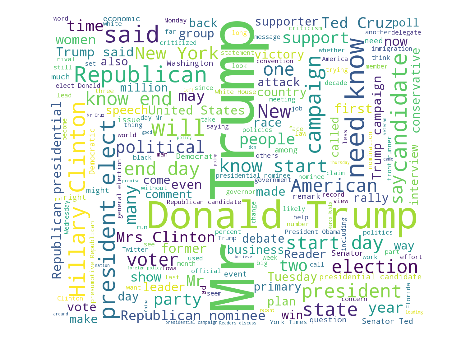

In [15]:
print('Most frequent words in 2016')
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Most frequent words in 2015


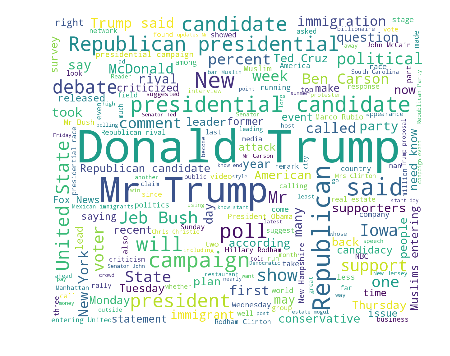

In [16]:
print('Most frequent words in 2015')
wordcloud_2015 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content_2015)


plt.imshow(wordcloud_2015)
plt.axis('off')
plt.show()

Most frequent words in 2014


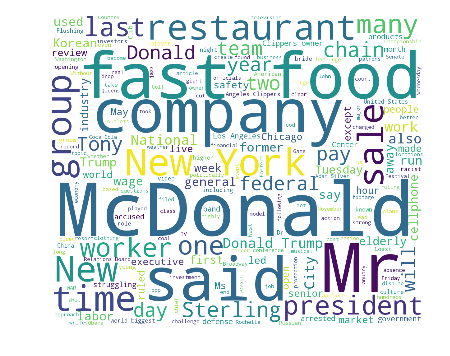

In [17]:
print('Most frequent words in 2014')
wordcloud_2014 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(all_content_2014)


plt.imshow(wordcloud_2014)
plt.axis('off')
plt.show()